# Introduction

Instead of going with a single model, we'll start with a reference model and then iterate on it using the techniques from this course to optimize it. Our reference model will be a standard linear regression model, and our machine learning task will be to predict the extent of fire damage to a forest.

Our data comes from the Forest Fires dataset from the UCI Machine Learning Repository. This dataset contains information on fires, along with the resulting damage and associated meteorological data. We want to know how these characteristics might be useful in predicting future fire damage.

The reference can be found here:
https://archive.ics.uci.edu/dataset/162/forest+fires

For this guides project the reference model will only use `temp` and `wind` as features. The outcome of interest is the `area` column, which represents the total area damaged by the fire.

#Data Dictionary

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec'
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - Fine Fuel Moisture Code (FFMC) index from the FWI system: 18.7 to 96.20
   6. DMC - Duff Moisture Code (DMC) index from the FWI system: 1.1 to 291.3
   7. DC - Drough Code (DC) index from the FWI system: 7.9 to 860.6
   8. ISI - Initial Spread index (ISI) from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40
   12. rain - outside rain in mm/m2 : 0.0 to 6.4
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

#Importing

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Instatiate Reference Model Object

Using X as : `temp` and `wind` columns

Using y as `area` column

In [123]:
X=fire[['temp','wind']]
y=fire['area']

reference = LinearRegression()

#Exploring Dataset

In [31]:
fire = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fires.csv')

#Missing Data
print("Missing data?", fire.info())

#first rows
fire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  517 non-null    int64  
 1   X           517 non-null    int64  
 2   Y           517 non-null    int64  
 3   month       517 non-null    object 
 4   day         517 non-null    object 
 5   FFMC        469 non-null    float64
 6   DMC         496 non-null    float64
 7   DC          474 non-null    float64
 8   ISI         515 non-null    float64
 9   temp        496 non-null    float64
 10  RH          487 non-null    float64
 11  wind        482 non-null    float64
 12  rain        485 non-null    float64
 13  area        517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB
Missing data? None


,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.0


#Cleaning dataset

1. convert moth,day to numeric
1. evaluate how to deal with missing values
1. No necessity of x,y coordinates
1. Drop unamed 0 (maybe index)

In [99]:
fire_mod = fire.drop(['Unnamed: 0','X','Y'],axis=1)

#map month, day column
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4,
    'fri': 5, 'sat': 6, 'sun': 7
}

fire_mod['month'] = fire_mod['month'].map(month_mapping)
fire_mod['day'] = fire_mod['day'].map(day_mapping)


from sklearn.impute import KNNImputer
#dealing with null values - input knn
imp = KNNImputer(missing_values=np.nan, n_neighbors=3)
fire_mod = pd.DataFrame(imp.fit_transform(fire_mod), columns=fire_mod.columns)

#Missing Data
print("Missing data?", fire_mod.info())

fire_mod.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    float64
 1   day     517 non-null    float64
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    float64
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(11)
memory usage: 44.6 KB
Missing data? None


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3.0,5.0,86.2,26.2,94.3,5.1,16.6,51.0,6.700000,0.0,0.0
1,10.0,2.0,90.6,80.2,669.1,6.7,18.0,33.0,0.900000,0.0,0.0
2,10.0,6.0,90.6,43.7,682.6,6.7,14.6,33.0,1.300000,0.0,0.0
3,3.0,5.0,91.7,33.3,77.5,9.0,8.3,97.0,4.000000,0.2,0.0
4,3.0,7.0,89.3,51.3,102.2,9.6,11.4,99.0,4.333333,0.0,0.0


#Check Outliers

Number of outliers in column 'FFMC': 53
Number of outliers in column 'DMC': 22
Number of outliers in column 'DC': 21
Number of outliers in column 'ISI': 23
Number of outliers in column 'temp': 8
Number of outliers in column 'RH': 10
Number of outliers in column 'wind': 13
Number of outliers in column 'rain': 8
Number of outliers in column 'area': 63


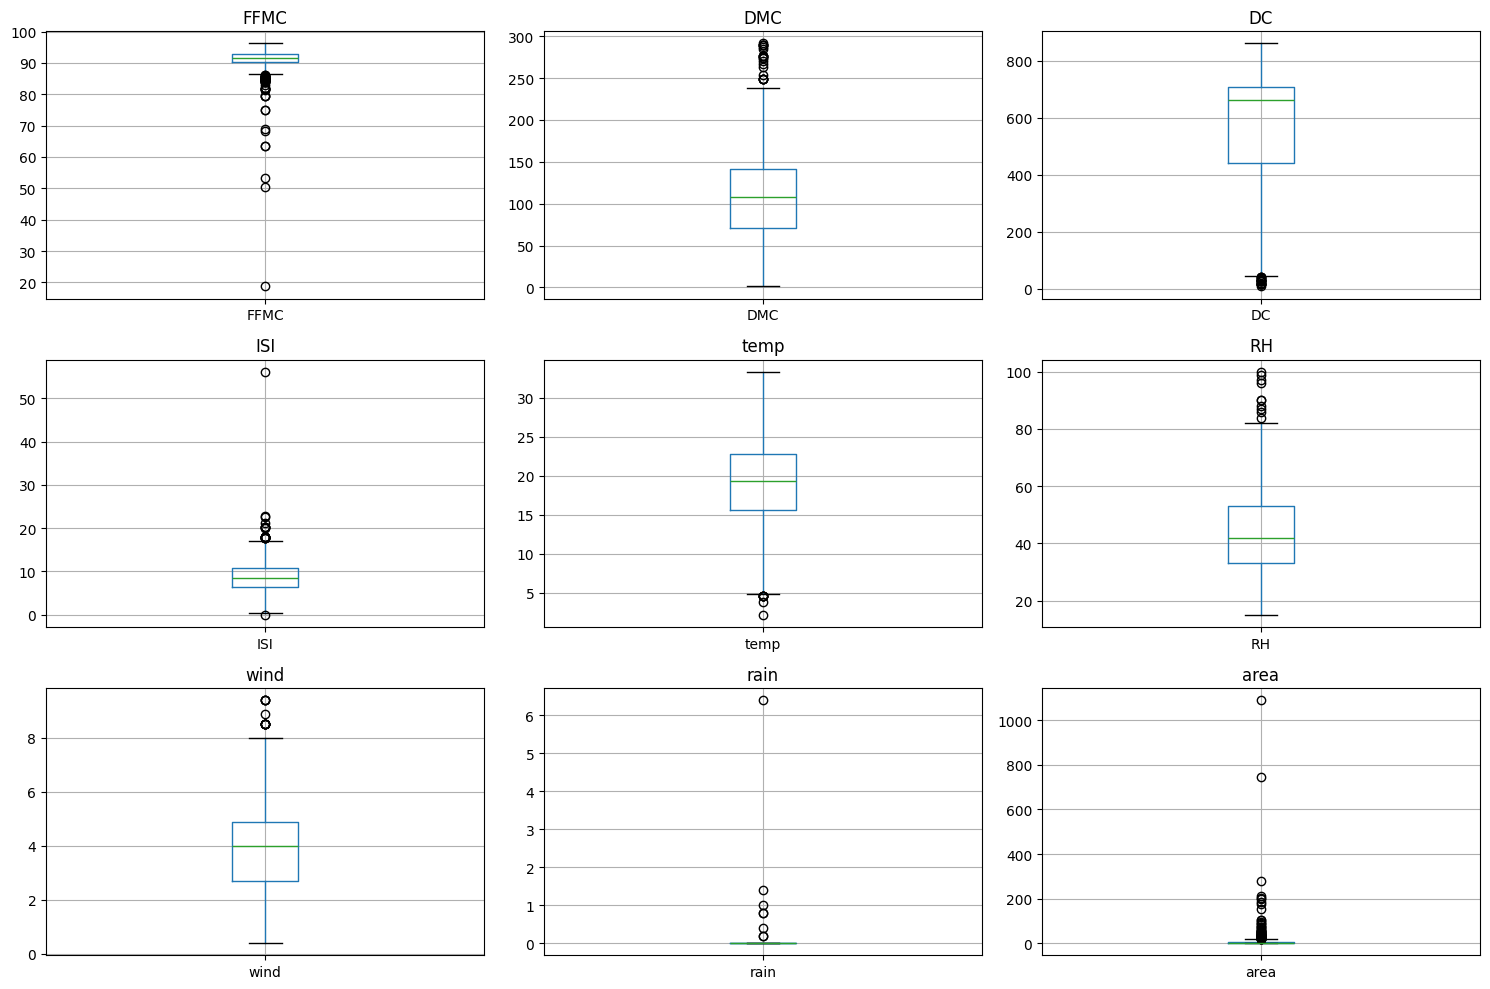

In [100]:
# prompt: plot boxplot to check outliers

# Assuming 'fire_mod' DataFrame is already loaded as in the provided code.

# Select numerical features for outlier detection
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Calculate IQR and identify outliers for each numerical feature
outlier_counts = {}

for col in numerical_features:
    quartiles = np.percentile(fire_mod[col],[25, 50, 75])
    Q1 = quartiles[0]
    Q3 = quartiles[2]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #outliers = fire_mod[(fire_mod[col] < lower_bound) | (fire_mod[col] > upper_bound)]
    outliers = sum((fire_mod[col] < lower_bound) | (fire_mod[col] > upper_bound))
    #outlier_counts[col] = len(outliers)
    outlier_counts[col] = outliers

# Print the number of outliers for each column
for col, count in outlier_counts.items():
    print(f"Number of outliers in column '{col}': {count}")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Create subplots for each feature
    fire_mod.boxplot(column=col)
    plt.title(col)

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()


We can see from the boxplots above that there are plenty of outliers for every column.

The number of outliers are described below:

* FFMC': 68
* 'DMC': 22
*  'DC': 77
* 'ISI': 23
*  'temp': 20
* 'RH': 10
* 'wind': 12
*  'rain': 40
* 'area': 63

We have two ways to solve this problem:

1. drop those outliers from the fire_mod dataset, or

1. Leave it anda analyse test score

Let's analyze the length of dataset with no outliers

In [101]:
# prompt: remove outliers from fire mod assign to a new variable, check if all outliers were removed

# Assuming 'fire_mod' DataFrame is already loaded and outlier detection is done as in the previous code.

# Create a copy of the DataFrame to store the data without outliers
fire_mod_no_outliers = fire_mod.copy()

# Iterate through numerical features and remove outliers
for col in numerical_features:
    Q1 = fire_mod_no_outliers[col].quantile(0.25)
    Q3 = fire_mod_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    fire_mod_no_outliers = fire_mod_no_outliers[
        (fire_mod_no_outliers[col] >= lower_bound) & (fire_mod_no_outliers[col] <= upper_bound)
    ]

# Verify if all outliers were removed (optional)
outlier_counts_after_removal = {}
for col in numerical_features:
    Q1 = fire_mod_no_outliers[col].quantile(0.25)
    Q3 = fire_mod_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after = fire_mod_no_outliers[
        (fire_mod_no_outliers[col] < lower_bound) | (fire_mod_no_outliers[col] > upper_bound)
    ]
    outlier_counts_after_removal[col] = len(outliers_after)

for col, count in outlier_counts_after_removal.items():
    print(f"Number of outliers in column '{col}' after removal: {count}")

#Check if the length of the original and the new dataframes are different.
print(f"Original dataframe length: {len(fire_mod)}")
print(f"New dataframe length: {len(fire_mod_no_outliers)}")


Number of outliers in column 'FFMC' after removal: 6
Number of outliers in column 'DMC' after removal: 15
Number of outliers in column 'DC' after removal: 21
Number of outliers in column 'ISI' after removal: 0
Number of outliers in column 'temp' after removal: 0
Number of outliers in column 'RH' after removal: 7
Number of outliers in column 'wind' after removal: 0
Number of outliers in column 'rain' after removal: 0
Number of outliers in column 'area' after removal: 30
Original dataframe length: 517
New dataframe length: 302


We can that it was a significant change in the dataset lenght after outliers removal.

 Thus, we will leave outliers as it is in the original dataset

##Z-Scaler transform

In [127]:
# prompt: use z-scale transformer in dataset



# Assuming 'fire_mod' DataFrame is already loaded and processed as in your provided code.

# Select numerical features for scaling (excluding 'area' for now)
numerical_features_to_scale = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
fire_mod[numerical_features_to_scale] = scaler.fit_transform(fire_mod[numerical_features_to_scale])

# Now 'fire_mod' DataFrame has the specified numerical features z-score scaled
print(fire_mod.head())


   month  day      FFMC       DMC        DC       ISI      temp        RH  \
0    3.0  5.0 -0.814815 -1.337375 -1.848361 -0.860187 -0.403884  0.417815   
1   10.0  2.0 -0.012289 -0.485796  0.498056 -0.508736 -0.159201 -0.714117   
2   10.0  6.0 -0.012289 -1.061400  0.553165 -0.508736 -0.753432 -0.714117   
3    3.0  5.0  0.188343 -1.225408 -1.916941 -0.003526 -1.854507  3.310528   
4    3.0  7.0 -0.249399 -0.941549 -1.816112  0.128267 -1.312708  3.436298   

       wind      rain  area  log_area  
0  1.518947 -0.073268   0.0       0.0  
1 -1.762153 -0.073268   0.0       0.0  
2 -1.535871 -0.073268   0.0       0.0  
3 -0.008462  0.603155   0.0       0.0  
4  0.180107 -0.073268   0.0       0.0  
month       0
day         0
FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
log_area    0
dtype: int64


###Outliers using standard deviation

Lets investigate if the data are in the range of -3<$σ$<3

In [103]:
# prompt: check number of outliers using z_score

# Assuming 'fire_mod' DataFrame is already loaded and processed as in your provided code.

# Select numerical features for outlier detection
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Calculate Z-scores for each numerical feature
outlier_counts_zscore = {}
for col in numerical_features:
    z_scores = np.abs((fire_mod[col] - fire_mod[col].mean()) / fire_mod[col].std())
    outliers = fire_mod[z_scores > 3]  # Identify outliers with Z-score > 3
    outlier_counts_zscore[col] = len(outliers)

# Print the number of outliers for each column using Z-score
for col, count in outlier_counts_zscore.items():
    print(f"Number of outliers in column '{col}' (Z-score): {count}")


Number of outliers in column 'FFMC' (Z-score): 7
Number of outliers in column 'DMC' (Z-score): 0
Number of outliers in column 'DC' (Z-score): 0
Number of outliers in column 'ISI' (Z-score): 2
Number of outliers in column 'temp' (Z-score): 0
Number of outliers in column 'RH' (Z-score): 4
Number of outliers in column 'wind' (Z-score): 4
Number of outliers in column 'rain' (Z-score): 3
Number of outliers in column 'area' (Z-score): 4


After using z_score as function to identify outliers in the main dataset, we found out that few observations lies outside of 3 standards deviation

Thus, we can conclude that most of observations falls **into 99% normally distribution**

#Checking AREA distribution

Using fire_mod (with outliers) check area distribution

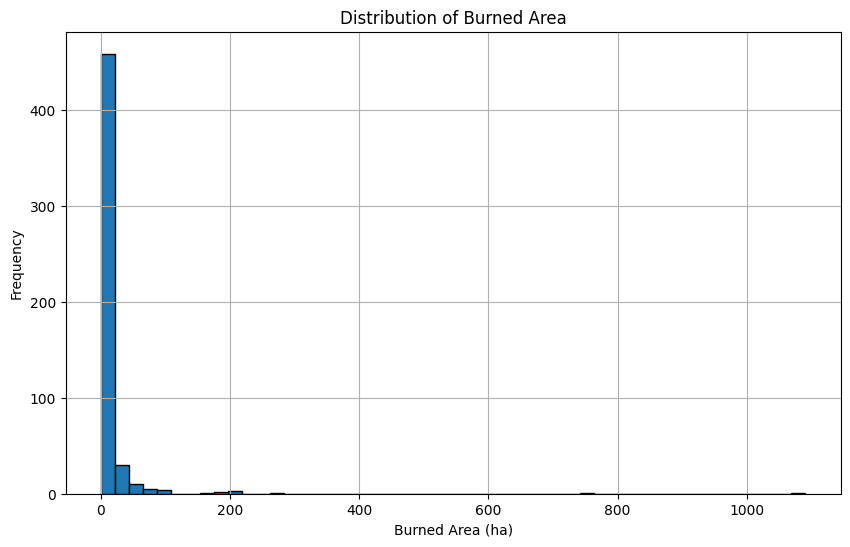

In [104]:
# prompt: plot area distribution

# Assuming 'fire_mod' DataFrame is already loaded as in your provided code.

# Check the distribution of the 'area' column
plt.figure(figsize=(10, 6))
plt.hist(fire_mod['area'], bins=50, edgecolor='k')  # Adjust 'bins' as needed
plt.xlabel('Burned Area (ha)')
plt.ylabel('Frequency')
plt.title('Distribution of Burned Area')
plt.grid(True)
plt.show()


The area distribution is highly right skewed. Meaning that most of fire occurs in areas lesser than 200 ha

Let's investigate log transform into area column

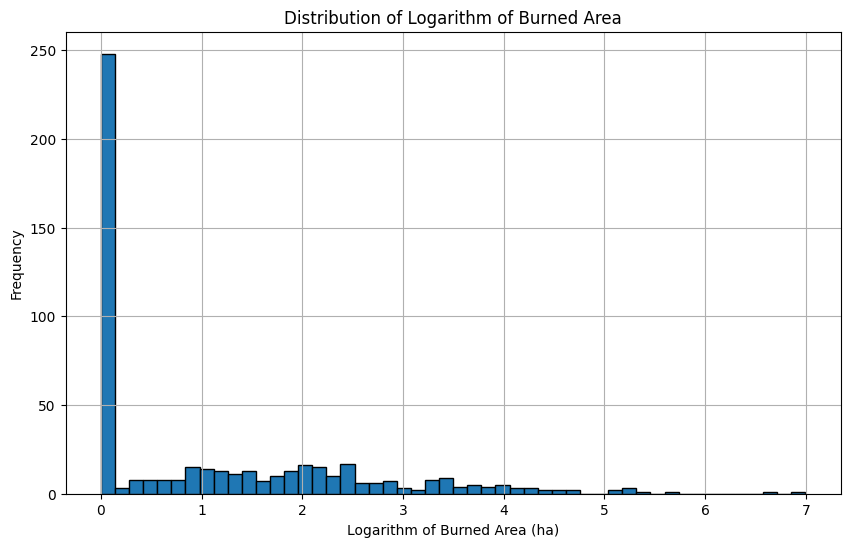

In [128]:
# prompt: transform area into log create new colum

# Calculate the logarithm of the 'area' column, adding 1 to avoid log(0)
fire_mod['log_area'] = np.log1p(fire_mod['area'])

# Plot the distribution of the log-transformed 'area'
plt.figure(figsize=(10, 6))
plt.hist(fire_mod['log_area'], bins=50, edgecolor='k')
plt.xlabel('Logarithm of Burned Area (ha)')
plt.ylabel('Frequency')
plt.title('Distribution of Logarithm of Burned Area')
plt.grid(True)
plt.show()


Using log function to transform data did not change in to a bell shape as predicted durign exercises, but it spread the data

# Data Trend Visualization


##Scatter Plot

Let's plot the relationship between each feature with area column

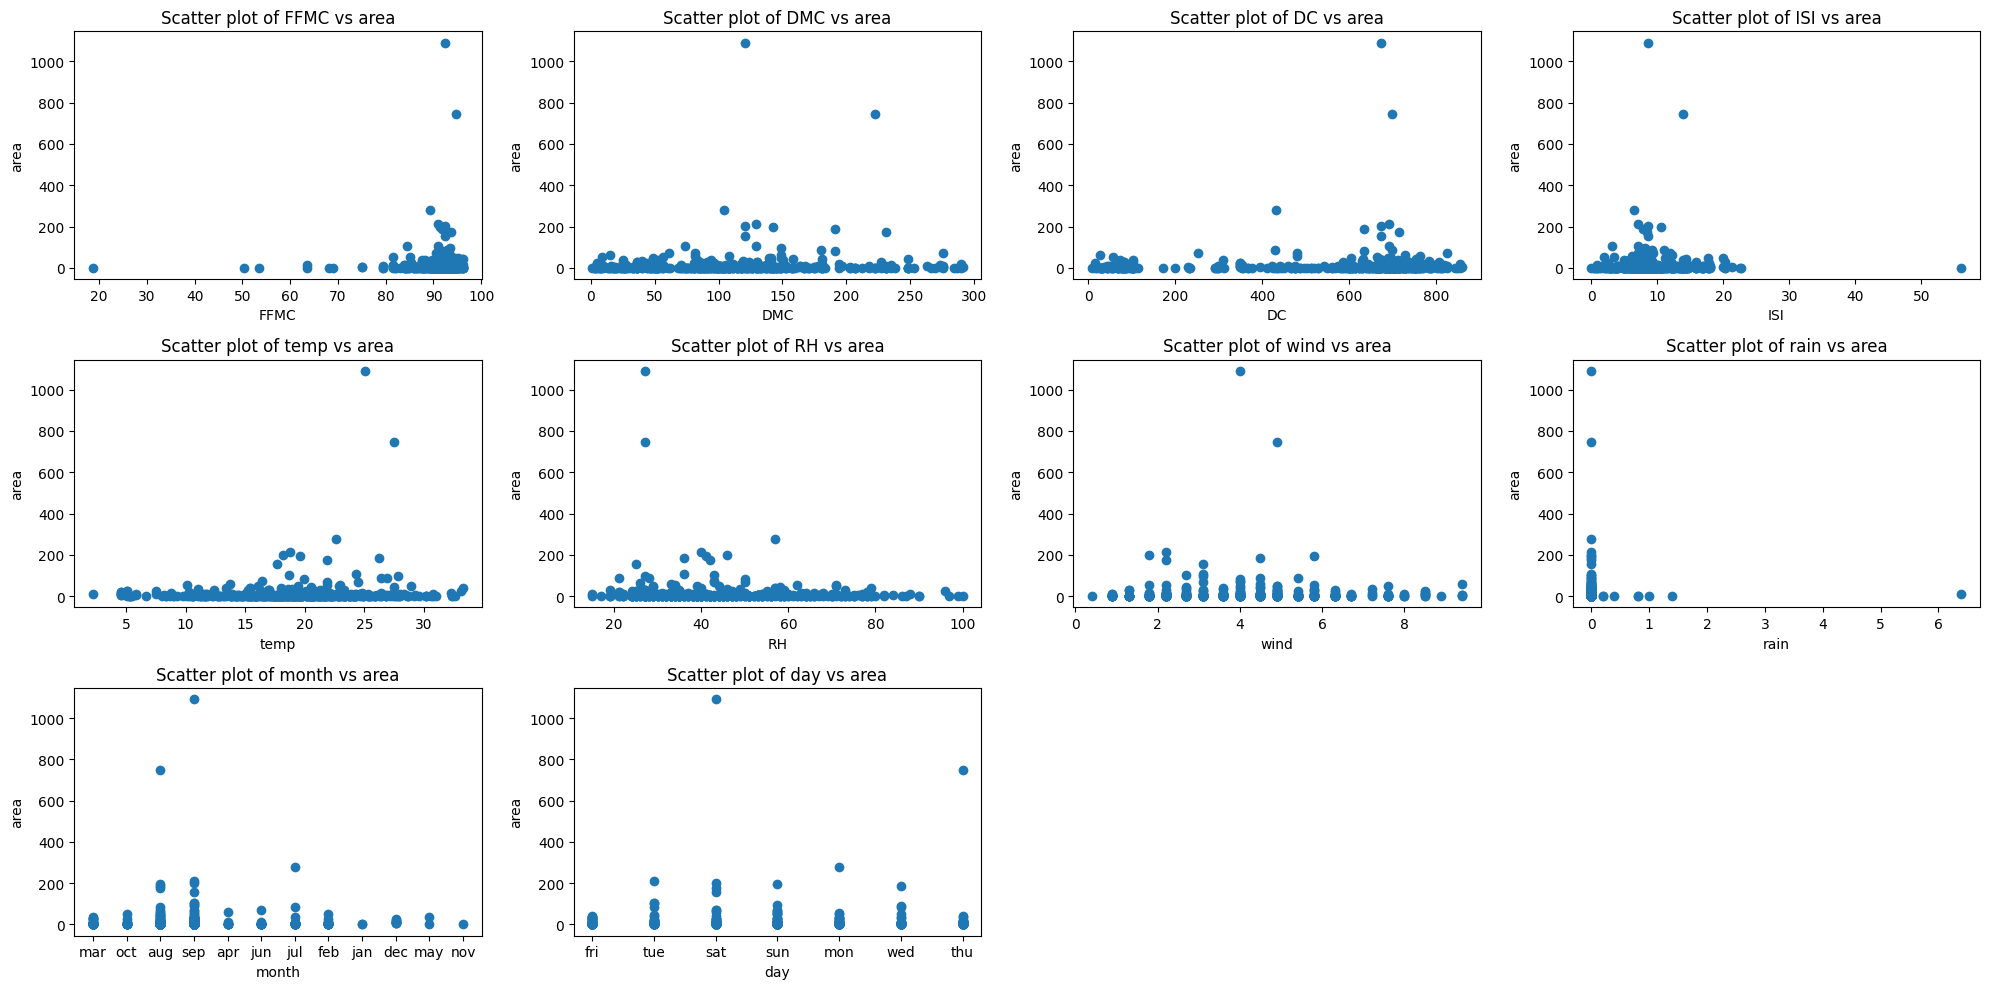

In [90]:
# prompt: generate scatter plot from each feature with area. use separeted plot. exclude area

import matplotlib.pyplot as plt

# Assuming 'fire_mod' DataFrame is already loaded and processed as in your provided code.

# Select features for the scatter plots (excluding 'area')
features_to_plot = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month', 'day']

# Create scatter plots for each feature against 'area'
plt.figure(figsize=(20, 10))  # Adjust figure size for better visualization
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 4, i + 1)  # Create subplots
    plt.scatter(fire_mod[feature], fire_mod['area'])
    plt.xlabel(feature)
    plt.ylabel('area')
    plt.title(f'Scatter plot of {feature} vs area')

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()


We can not see any pattern of quadratic trend using scatter plot

#Subset Selection

so let's use feature selection to determine which features might be useful for generating predictions

1. Perform sequential feature selection on the features in the dataset.

1. Let's try both forward and backward selection.

##Forward Selection


In [129]:
from sklearn.feature_selection import SequentialFeatureSelector
y=fire_mod['log_area']
X=fire_mod.drop(['area','log_area'],axis=1)


#Let's create 3 possible selection models
#Selection 1 - n_feature 2
sfs_model = LinearRegression()
forward2 = SequentialFeatureSelector(estimator=sfs_model,
                                     n_features_to_select=2,
                                     direction="forward")

#Selection 1 - n_feature 4
sfs_model2 = LinearRegression()
forward4 = SequentialFeatureSelector(estimator=sfs_model2,
                                     n_features_to_select=4,
                                     direction="forward")

#Selection 1 - n_feature 6
sfs_model3 = LinearRegression()
forward6 = SequentialFeatureSelector(estimator=sfs_model3,
                                       n_features_to_select=6,
                                       direction="forward")


forward2.fit(X, y)
forward4.fit(X, y)
forward6.fit(X, y)

print("Features selected in 2 feature model:", forward2.get_feature_names_out())
print("Features selected in 4 feature model:", forward4.get_feature_names_out())
print("Features selected in 6 feature model:", forward6.get_feature_names_out())

Features selected in 2 feature model: ['month' 'wind']
Features selected in 4 feature model: ['month' 'day' 'FFMC' 'wind']
Features selected in 6 feature model: ['month' 'day' 'FFMC' 'ISI' 'RH' 'wind']


In [130]:
print(X.isna().sum())

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
dtype: int64


##Backward Selection



In [108]:
backward2 = SequentialFeatureSelector(estimator=sfs_model,
                                     n_features_to_select=2,
                                     direction="backward")

backward4 = SequentialFeatureSelector(estimator=sfs_model,
                                     n_features_to_select=4,
                                     direction="backward")

backward6 = SequentialFeatureSelector(estimator=sfs_model,
                                       n_features_to_select=6,
                                       direction="backward")

backward2.fit(X, y)
backward4.fit(X, y)
backward6.fit(X, y)

print("Features selected in 2 feature model:", backward2.get_feature_names_out())
print("Features selected in 4 feature model:", backward4.get_feature_names_out())
print("Features selected in 6 feature model:", backward6.get_feature_names_out())

Features selected in 2 feature model: ['DC' 'wind']
Features selected in 4 feature model: ['day' 'FFMC' 'DC' 'wind']
Features selected in 6 feature model: ['day' 'FFMC' 'DC' 'ISI' 'RH' 'wind']



Based on the features chosen by forward and backward selection, it seems like `DC`, `wind` and `FFMC` seem to be the most impactful on predicting `log_area`.

##Creating Models

In [110]:
fw2_model = LinearRegression().fit(X[forward2.get_feature_names_out()], y)
fw4_model = LinearRegression().fit(X[forward4.get_feature_names_out()], y)
fw6_model = LinearRegression().fit(X[forward6.get_feature_names_out()], y)

bw2_model = LinearRegression().fit(X[backward2.get_feature_names_out()], y)
bw4_model = LinearRegression().fit(X[backward4.get_feature_names_out()], y)
bw6_model = LinearRegression().fit(X[backward6.get_feature_names_out()], y)

#More Candidate Models

The models chosen by subset selection are still linear models at heart, and they may not be the best solution to this problem.

Despite their widespread utility, some problems have a non-linear component that standard linear regression models can't account for. Think about incorporating some of the more flexible models that we've learned about as candidate models: **polynomials** and **splines**.

##Lasso Model

In [120]:
from sklearn.linear_model import LassoCV,RidgeCV

ridge = RidgeCV(alphas = np.linspace(1, 10000, num=1000))
lasso = LassoCV(alphas=np.linspace(1, 10000, num=10))

ridge.fit(X,y)
lasso.fit(X, y)

ridge_coef = ridge.coef_
lasso_coefficients = lasso.coef_

print("Ridge tuning parameter: ", ridge.alpha_)
print("LASSO tuning parameter: ", lasso.alpha_)
print(ridge_coef)
print(lasso_coefficients)

Ridge tuning parameter:  2233.009009009009
LASSO tuning parameter:  10000.0
[ 0.03611329  0.00109069  0.00589294  0.00894576  0.00425072 -0.00773839
  0.00373287 -0.01049153  0.01896144  0.00574657]
[ 0.  0.  0.  0.  0. -0.  0. -0.  0.  0.]


The LASSO tuning parameter always seems to be on the extreme. Given that the outcome has many small values, it suggests that having no features at all is better than having any.

##Polynomial Model

#K-Fold Cross Validation

Now that we have a few candidate models, let's evaluate all of them using k-fold cross-validation. As we've seen before, k-fold cross-validation gives us a better idea about model performance on unseen datasets compared to a single train-test split.

In [131]:
from sklearn.model_selection import cross_val_score

#using cross-validation to test
reference_cv = cross_val_score(reference, X[["wind", "temp"]], y, cv = 5, scoring = "neg_mean_squared_error")
fw2_cv = cross_val_score(fw2_model, X[forward2.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
fw4_cv = cross_val_score(fw4_model, X[forward4.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
fw6_cv = cross_val_score(fw6_model, X[forward6.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
bw2_cv = cross_val_score(bw2_model, X[backward2.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
bw4_cv = cross_val_score(bw4_model, X[backward4.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
bw6_cv = cross_val_score(bw6_model, X[backward6.get_feature_names_out()], y, cv = 5, scoring = "neg_mean_squared_error")
ridge_cv = cross_val_score(ridge, X, y, cv = 5, scoring = "neg_mean_squared_error")

#Predicting Values

In [132]:
print("Reference Model, Avg Test MSE: ", np.mean(reference_cv), " SD: ", np.std(reference_cv))
print("Forward-2 Model, Avg Test MSE: ", np.mean(fw2_cv), " SD: ", np.std(fw2_cv))
print("Forward-4 Model, Avg Test MSE: ", np.mean(fw4_cv), " SD: ", np.std(fw4_cv))
print("Forward-6 Model, Avg Test MSE: ", np.mean(fw6_cv), " SD: ", np.std(fw6_cv))
print("Backward-2 Model, Avg Test MSE: ", np.mean(bw2_cv), " SD: ", np.std(bw2_cv))
print("Backward-4 Model, Avg Test MSE: ", np.mean(bw4_cv), " SD: ", np.std(bw4_cv))
print("Backward-6 Model, Avg Test MSE: ", np.mean(bw6_cv), " SD: ", np.std(bw6_cv))
print("Ridge Model, Avg Test MSE: ", np.mean(bw6_cv), " SD: ", np.std(bw6_cv))

Reference Model, Avg Test MSE:  -2.2119124007657924  SD:  1.0653706959212474
Forward-2 Model, Avg Test MSE:  -2.165894078462002  SD:  0.9765670594974641
Forward-4 Model, Avg Test MSE:  -2.1747442026613992  SD:  0.9830408778518758
Forward-6 Model, Avg Test MSE:  -2.2031438997435377  SD:  0.9785990418279664
Backward-2 Model, Avg Test MSE:  -2.1731692591143275  SD:  1.004886029832005
Backward-4 Model, Avg Test MSE:  -2.178947656317581  SD:  1.0058362534549798
Backward-6 Model, Avg Test MSE:  -2.2073803674165937  SD:  0.9971568922071022
Ridge Model, Avg Test MSE:  -2.2073803674165937  SD:  0.9971568922071022


Among our candidate models, the backward selection model using two features performs the best, with an average MSE of **-2.17.** However, note that this is on the log-scale, so this suggests that the predictions are off by a magnitude of about 2. On the surface, this suggests that the models overall are not good predictors.

However, this problem is known to be a difficult one. The extreme skew in the outcome hurts many of the assumptions needed by linear models. We hope that this showcases that machine learning is not a universal fix. Several problems have characteristics that make prediction difficult.